# Graphes de comparaison

## Importation des librairies

In [41]:
# Importation des librairies
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importation des données

In [42]:
complete_csv = pd.read_pickle('./Datasets/complete_dataset_no_scaling.pkl')
analysis_dataset = complete_csv.copy()

## Chances d'attrition en fonction du temps de travail et du salaire

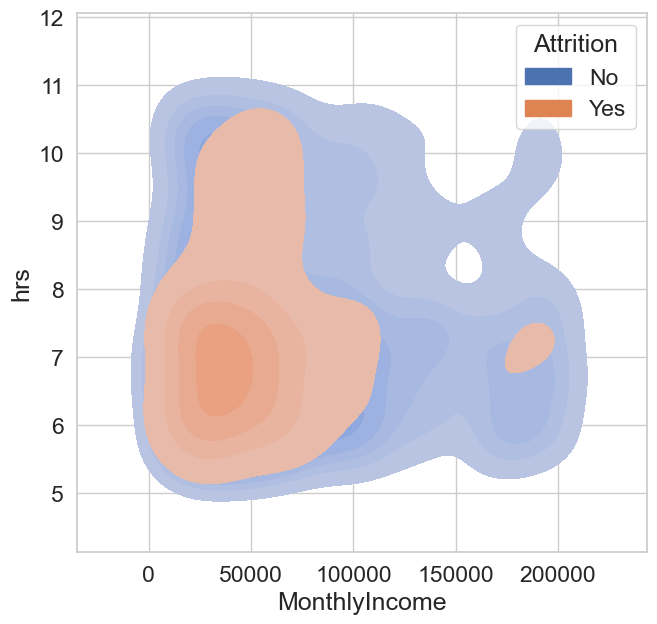

In [72]:
sns.set( font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
sns.kdeplot(
    data=analysis_dataset, x="MonthlyIncome", y="hrs", hue="Attrition", fill=True, levels=10, thresh=.06,
)
plt.show()

## Corrélation entre le salaire et la satisfaction au travail

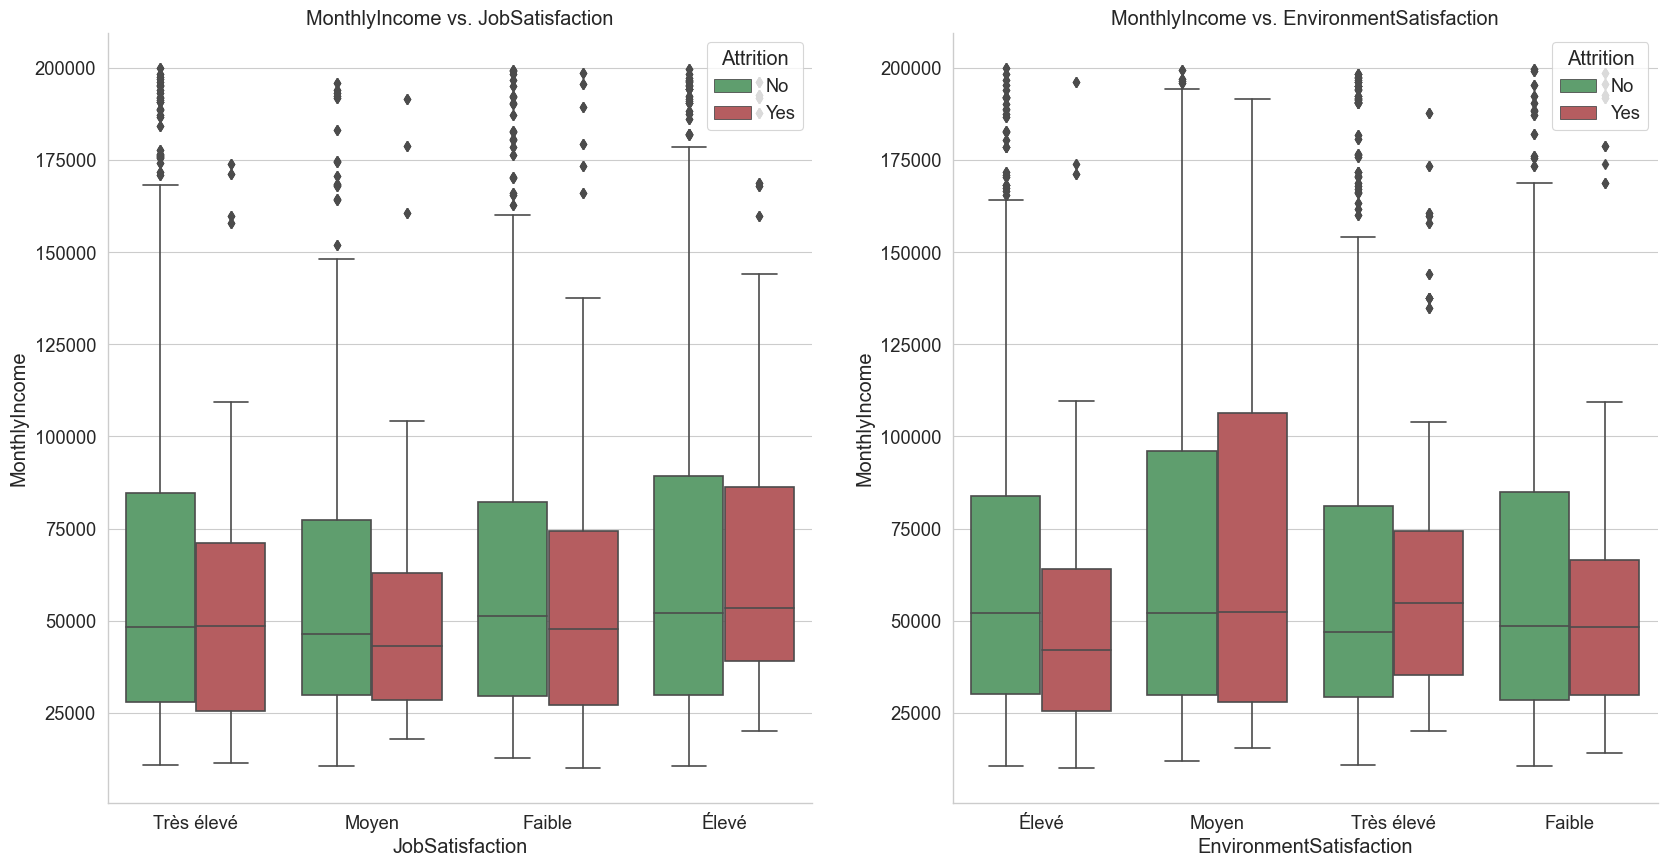

In [43]:
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

plt.subplot(1,2,1)
sns.boxplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition", palette=['g','r'], data=analysis_dataset)
plt.legend(loc=1,title='Attrition')
sns.despine()
plt.title('MonthlyIncome vs. JobSatisfaction')

plt.subplot(1,2,2)
sns.boxplot(x="EnvironmentSatisfaction", y="MonthlyIncome", hue="Attrition", palette=['g','r'], data=analysis_dataset)
plt.legend(loc=1,title='Attrition')
sns.despine()
plt.title('MonthlyIncome vs. EnvironmentSatisfaction')

plt.show()

## Corrélation entre l'attrition et la qualité du travail et de l'environnement

In [45]:
#Préparation des données pour les prochains graphes
analysis_dataset['Attrition'] = analysis_dataset['Attrition'].replace({'1': 1, '0': 0})
analysis_dataset['JobInvolvement'] = analysis_dataset['JobInvolvement'].replace({'Faible': 0, 'Moyenne': 1, 'Importante': 2, 'Très importante': 3})
analysis_dataset['PerformanceRating'] = analysis_dataset['PerformanceRating'].replace({'Excellent': 0, 'Au delà des attentes': 1})

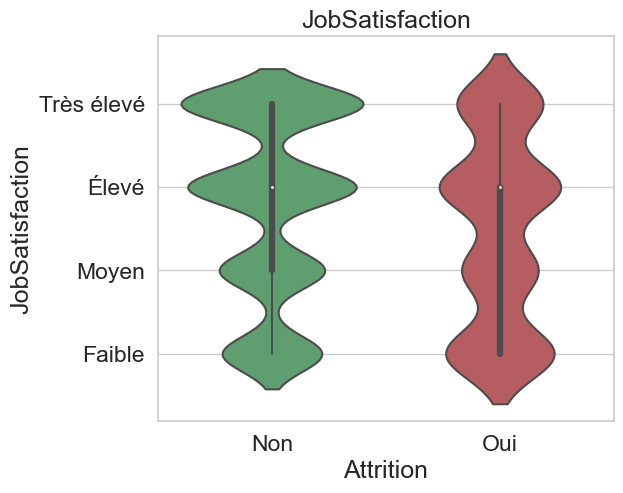

In [67]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plot1 = sns.violinplot(data=analysis_dataset, x="Attrition", y="JobSatisfaction", palette=['g','r'])
plot1.set_xticklabels(['Non','Oui'])
plot1.set_yticks(range(4))
plot1.set_yticklabels(['Faible','Moyen', 'Élevé', 'Très élevé'])
plt.title('JobSatisfaction')

plt.show()

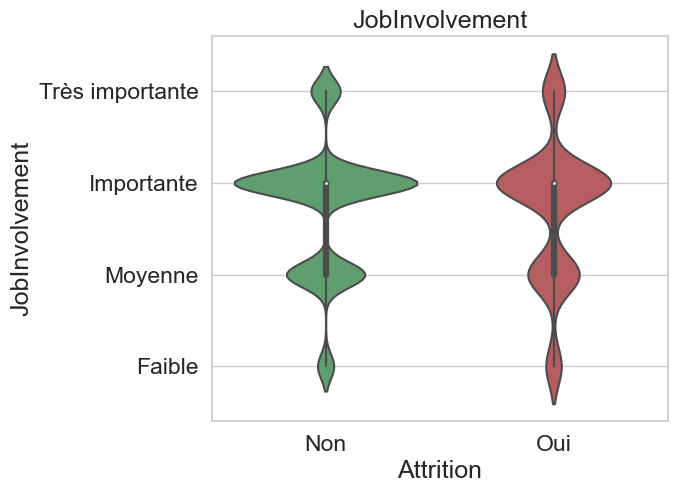

In [69]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,2)
plot2 = sns.violinplot(data=analysis_dataset, x="Attrition", y="JobInvolvement", palette=['g','r'])
plot2.set_xticklabels(['Non','Oui'])
plot2.set_yticks(range(4))
plot2.set_yticklabels(['Faible','Moyenne', 'Importante', 'Très importante'])
plt.title('JobInvolvement')

plt.show()

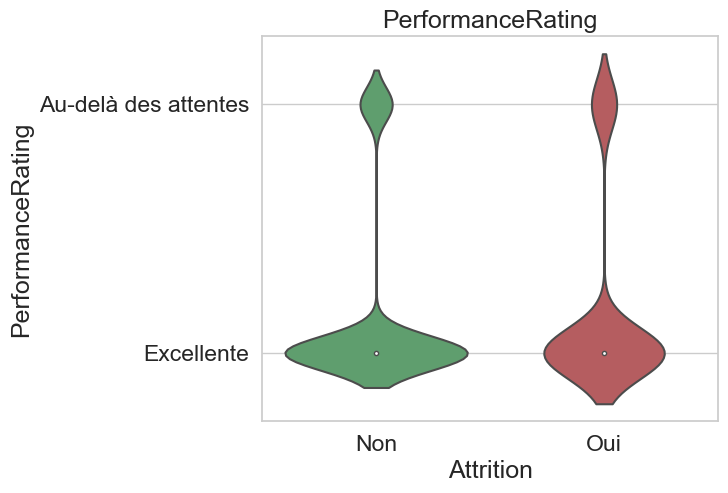

In [68]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,3)
plot3 = sns.violinplot(data=analysis_dataset, x="Attrition", y="PerformanceRating", palette=['g','r'])
plot3.set_xticklabels(['Non','Oui'])
plot3.set_yticks(range(2))
plot3.set_yticklabels(['Excellente','Au-delà des attentes'])
plt.title('PerformanceRating')

plt.show()